In [238]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.datasets import load_boston

boston = load_boston()
model_boston = LR().fit(boston.data, boston.target)

In [239]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [262]:
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [263]:
boston.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [264]:
model_boston.intercept_

36.459488385089855

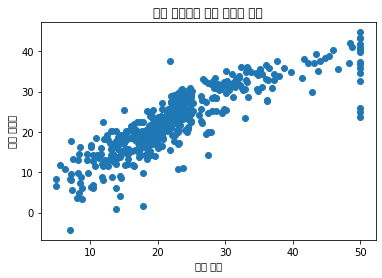

In [265]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.title("집값 예측치와 실제 집값의 관계")
plt.show()

### 분석할 데이터를 데이터프레임 형태로 변환
#### 독립변수 행렬 -> dfX
#### 종속변수(MEDV) 벡터 -> dfy

In [240]:
import pandas as pd

dfX = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

### 독립변수와 종속변수 df 를 편의를 위해 하나로 묶어준다.

In [241]:
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


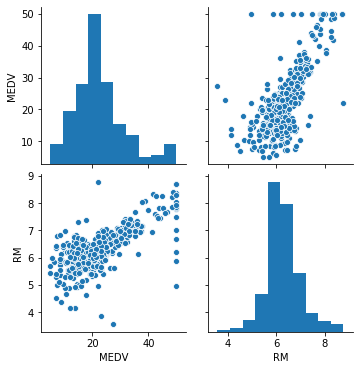

In [244]:
import seaborn as sns

sns.pairplot(df[["MEDV", "RM"]])
plt.show()

#### MEDV: 집값
#### RM: 방 개수

### 방 개수가 증가할 수록 집값도 증가

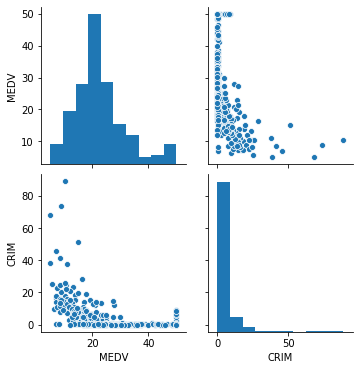

In [245]:
sns.pairplot(df[["MEDV", "CRIM"]])
plt.show()

### 범죄율이 매우 낮은 곳의 집 값이 고르게 분포하고,
### 범죄율이 높아질 수록 집 값이 낮은 곳에 분포하며,
### 범죄율이 일정 이상 높아지면, 집의 개수가 적다.

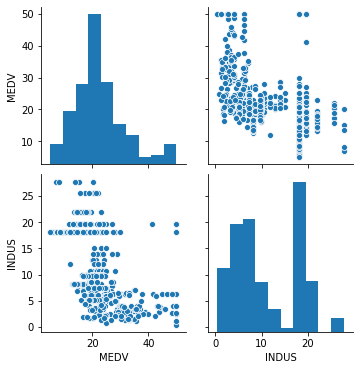

In [246]:
sns.pairplot(df[["MEDV", "INDUS"]])
plt.show()

### 비소매 상업지역의 비율이 매우 높은 곳에서는
### 집값의 분포가 낮은 것을 볼 수 있다.

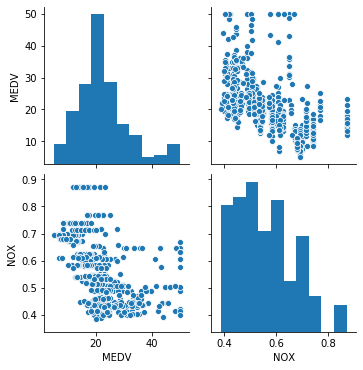

In [247]:
sns.pairplot(df[["MEDV", "NOX"]])
plt.show()

### 일산화질소의 농도가 일정이상(0.65정도이상)일 때
### 집값의 분포가 낮게 나타난다.

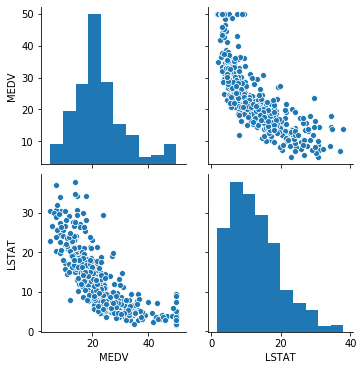

In [248]:
sns.pairplot(df[["MEDV", "LSTAT"]])
plt.show()

### 하위계층의 비율은 집값과 반비례하는 모습이 분명하게 나타난다.

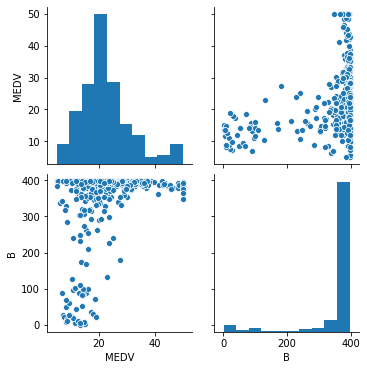

In [251]:
sns.pairplot(df[["MEDV", "B"]])
plt.show()

### 흑인 비율이 매우 높은 곳의 집 값 분포가 넓게 나타나며,
### 비싼 집들의 분포가 집중 되어있다!

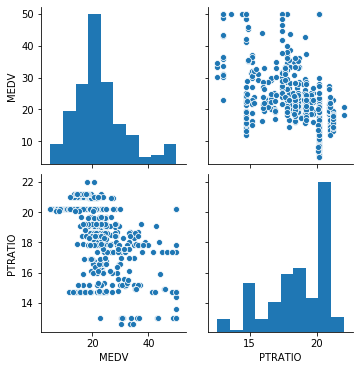

In [253]:
sns.pairplot(df[["MEDV", "PTRATIO"]])
plt.show()

### 학생/교사 비율은 큰 영향을 미치지 않아 보인다.

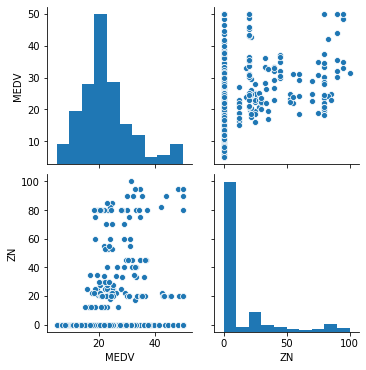

In [254]:
sns.pairplot(df[["MEDV", "ZN"]])
plt.show()

### 거주 지역 면적이 2만 5천을 넘는 비율도 큰 영향을 미치지 않아 보인다.

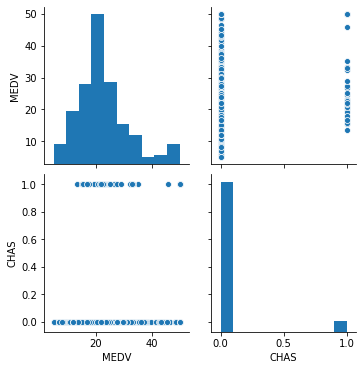

In [255]:
sns.pairplot(df[["MEDV", "CHAS"]])
plt.show()

### 찰스강에 가까운 거주지의 최소 집값이 조금 높게 나오긴 하지만
### 큰 영향은 없어보인다.

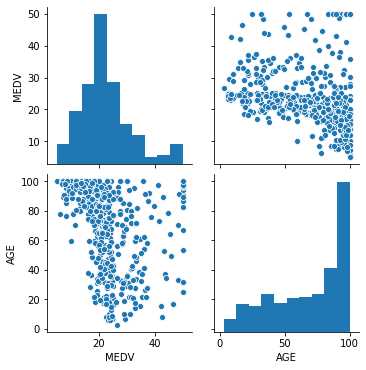

In [256]:
sns.pairplot(df[["MEDV", "AGE"]])
plt.show()

### 집의 노후화 정도 또한 크게 영향은 없어 보인다.

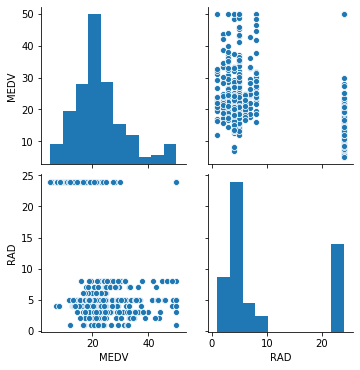

In [257]:
sns.pairplot(df[["MEDV", "RAD"]])
plt.show()

### 방사형 고속도리까지의 거리도 큰 영향은 미치지 않아 보인다.

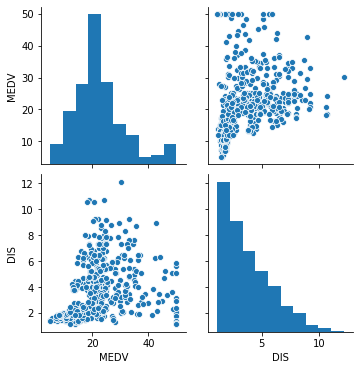

In [258]:
sns.pairplot(df[["MEDV", "DIS"]])
plt.show()

### 직업센터까지의 거리도 큰 영향이 없어 보인다.

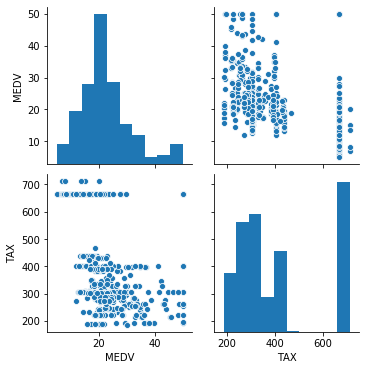

In [259]:
sns.pairplot(df[["MEDV", "TAX"]])
plt.show()

### 재산세율도 큰 영향이 없어 보인다.

### RM(방의 개수): +, 1차
### CRIM(범죄율); -, 지수
### LSTAT(하위계층의 비율): -, 1차
### B(흑인 비율): +, 지수


In [266]:
import pandas as pd

dfX_ = sm.add_constant(dfX)
# dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX_)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 17 May 2020   Prob (F-statistic):          6.72e-135
Time:                        17:13:14   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
C